In [1]:
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics', 'talk.politics.misc']

data = fetch_20newsgroups(categories=categories, remove=('headers', 'footers', 'quotes'))
data.target_names

['comp.graphics',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
data_df = pd.DataFrame([data.data, data.target.tolist()]).T
data_df.columns = ['text', 'target']

targets = pd.DataFrame(data.target_names)
targets.columns=['title']

news_data = pd.merge(data_df, targets, left_on='target', right_index=True)
news_data.head().reset_index()

,index,text,target,title
0,0,\n\n\n\n\n\n\nNice dodge. I give it a 9.2.\n\n...,3,talk.politics.misc
1,9,\n[...]\n\n\nYou seem to be saying that a LIMI...,3,talk.politics.misc
2,25,"\n Nationwide, the immunization rate among ...",3,talk.politics.misc
3,40,"\n The immunization program is just a ""usef...",3,talk.politics.misc
4,45,The following was posted and no doubt retyped ...,3,talk.politics.misc


In [5]:
news_data.isnull().any()

text      False
target    False
title     False
dtype: bool

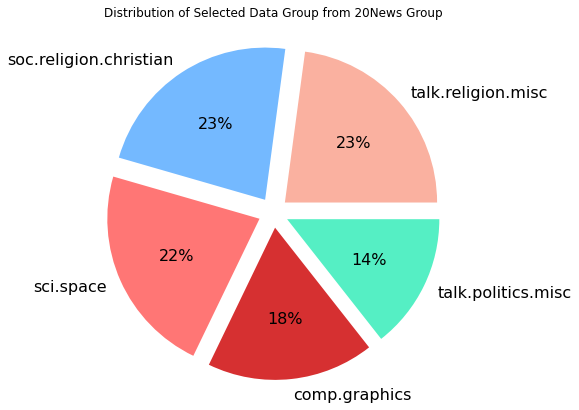

In [6]:
size = news_data.target.value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
custom_colors = ['#fab1a0', '#74b9ff', '#ff7675', '#d63031', '#55efc4']



plt.figure(figsize=(7,7))
plt.pie(size, autopct='%1.0f%%', explode=explode, labels=categories, textprops={'fontsize' : 16}, colors=custom_colors)
plt.title("Distribution of Selected Data Group from 20News Group")
plt.show()

In [7]:
vectorizer = CountVectorizer(stop_words='english')

In [8]:
all_features = vectorizer.fit_transform(news_data.text)

In [9]:
all_features.shape

(2618, 31457)

In [10]:
vectorizer.vocabulary_

{'nice': 19784,
 'dodge': 10082,
 'answer': 3777,
 'questions': 23170,
 'believe': 5064,
 'draft': 10211,
 'armed': 4145,
 'services': 25607,
 'voluntary': 30351,
 'say': 25122,
 'taxes': 27948,
 've': 30000,
 'answered': 3779,
 'question': 23161,
 'saying': 25124,
 'limited': 17428,
 'government': 13422,
 'provide': 22853,
 'opportunities': 20504,
 'private': 22540,
 'interests': 15734,
 'use': 29771,
 'pursue': 23035,
 'agendas': 3210,
 'asking': 4263,
 'libertarians': 17331,
 'prove': 22847,
 'happen': 13905,
 'offer': 20319,
 'proof': 22724,
 'pretty': 22453,
 'damn': 8733,
 'plausible': 21844,
 'does': 10088,
 'regulate': 23836,
 'particular': 21110,
 'area': 4080,
 'tool': 28618,
 'suspect': 27648,
 'sort': 26445,
 'likely': 17409,
 'instances': 15617,
 'improvement': 15143,
 'human': 14671,
 'condition': 7659,
 'define': 9050,
 'primary': 22500,
 'goal': 13326,
 'libertarianism': 17330,
 'libertarian': 17329,
 'impression': 15134,
 'elimination': 10729,
 'coercion': 7162,
 'case

In [11]:
x_train, x_test, y_train, y_test = train_test_split(all_features, data.target, test_size = 0.35, random_state=25)

In [12]:
x_train.shape

(1701, 31457)

In [13]:
x_test.shape

(917, 31457)

In [14]:
classifier = MultinomialNB()

In [15]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [16]:
nr_correct = (y_test == classifier.predict(x_test)).sum()

In [17]:
print(f'{nr_correct} documents classified correctly')

197 documents classified correctly


In [18]:
nr_incorrect = y_test.size - nr_correct

print(f'Number of documents incorrectly classified is {nr_incorrect}')

Number of documents incorrectly classified is 720


In [19]:
fraction_of_wrong = nr_incorrect / (nr_correct + nr_incorrect)

print(f'The (testing) accuracy of the model is {1-fraction_of_wrong:.2%}')

The (testing) accuracy of the model is 21.48%


In [20]:
### cross check with classifier score with sklearn


classifier.score(x_test, y_test)

0.2148309705561614

In [21]:
from sklearn.metrics import recall_score, precision_score, f1_score



In [22]:
recall_score(y_test, classifier.predict(x_test), average='micro')

0.2148309705561614

In [23]:
precision_score(y_test, classifier.predict(x_test), average='micro')

0.2148309705561614

In [24]:
f1_score(y_test, classifier.predict(x_test), average='micro')

0.2148309705561614

In [25]:
example = ['hello, how are you?',
          'new graphic card in the market',
          'jesus can turn water into fine wine',
          'fine dine with president',
          'come and get new computer']


doc_term_mat = vectorizer.transform(example)

classifier.predict(doc_term_mat)


array([2, 1, 2, 1, 3], dtype=int64)

In [27]:

data_df.head()

,text,target
0,\n\n\n\n\n\n\nNice dodge. I give it a 9.2.\n\n...,3
1,Archive-name: space/schedule\nLast-modified: $...,1
2,\n\n\n\n,1
3,\n Lev 17:11: For the life of the flesh is in...,4
4,\n\nI agree with you about the upgrade path; b...,0


In [28]:
news_data.head()

,text,target,title
0,\n\n\n\n\n\n\nNice dodge. I give it a 9.2.\n\n...,3,talk.politics.misc
9,\n[...]\n\n\nYou seem to be saying that a LIMI...,3,talk.politics.misc
25,"\n Nationwide, the immunization rate among ...",3,talk.politics.misc
40,"\n The immunization program is just a ""usef...",3,talk.politics.misc
45,The following was posted and no doubt retyped ...,3,talk.politics.misc
